# Dynamic of Network: part -III

 This is part three on "Dynamic of Network" code series, please refer to part 1 and 2 before proceeding ahead.

**Tasks**:
Lets modify the preferential node function so that the node selection probability p(i) is each of the following:
- Task 1: independent of the node degree (**random attachment**)
- Task 2: proportional to the square of the node degree (**strong preferential attachment**)
- Task 3: inversely proportional to the node degree (**negative preferential attachment**)

lets simulations for these cases and compare the resulting network topologies.

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

This function below (**initialize_graph(n, k)**) is used to create an initial network of nodes with each node connected to its k nearest neighbors. The network is a graph G where each node is connected to its k nearest neighbors, creating a circular structure. 

In [2]:
def initialize_graph(n, k):
    """
    Initializes a circular graph with n nodes where each node is connected to k nearest neighbors.
    """
    G = nx.Graph()
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    return G

Defining the new **selection functions**:

In [3]:
def random_attachment(G):
    nodes = list(G.nodes())
    return random.choice(nodes)

def strong_preferential_attachment(G):
    degrees = np.array([G.degree(n) for n in G.nodes()])
    degrees_squared = degrees**2
    probabilities = degrees_squared / np.sum(degrees_squared)
    return np.random.choice(G.nodes(), p=probabilities)

def negative_preferential_attachment(G):
    degrees = np.array([G.degree(n) for n in G.nodes()])
    inverse_degrees = 1 / degrees
    probabilities = inverse_degrees / np.sum(inverse_degrees)
    return np.random.choice(G.nodes(), p=probabilities)


The **update_graph function** represents an evolution or dynamic change in your network. This function implements a sort of "rewiring" operation.

Lets modify our update_graph function to take the selection functions as a parameter.

In [4]:
def update_graph(G, selection_function):
    new_node = len(G.nodes())
    selected_node = selection_function(G)
    G.add_edge(new_node, selected_node)
    return G


Lets define our **simulate_network_dynamics function** (from part 2)).

In [12]:
def simulate_network_dynamics(n, k, steps, selection_function):
    """
    Simulates network dynamics and plots the network state at intervals.

    :param n: Number of nodes in the network.
    :param k: Number of neighbors of each node.
    :param steps: Number of steps to simulate.
    :param selection_function: Function used to select a node for preferential attachment.

    This function initializes a network with n nodes and k neighbors for each node. 
    Then, it performs a specified number of steps to simulate network dynamics, where
    at each step, the network's topology is updated using preferential attachment. 
    The state of the network and its degree distribution are plotted at the start, at each 25th step, 
    and at the end of simulation in 2-row subplot: first row for network structure, and second row for degree distribution.
    """

    # Initialize the network
    G = initialize_graph(n, k)
    
    # Calculate the number of subplots needed
    num_subplots = ((steps - 1) // 25) + 2  # +2 for time step 0 and the final time step
    
    # Create a figure to hold the subplots
    fig, axs = plt.subplots(2, num_subplots, figsize=(6 * num_subplots, 12))  # 2 rows and num_subplots columns
    
    # Plot initial network (t=0)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, ax=axs[0, 0])  # axs[0, 0] for the first subplot
    nx.draw_networkx_edges(G, pos, ax=axs[0, 0])  # axs[0, 0] for the first subplot
    axs[0, 0].set_title('Network at Time Step 0')  # Set title for the first subplot

    # Plot degree distribution (t=0)
    degrees = dict(G.degree())
    axs[1, 0].hist(degrees.values(), bins=range(1, max(degrees.values()) + 1), edgecolor='black')
    axs[1, 0].set_title('Degree Distribution at Time Step 0')  # Set title for the first subplot

    for step in range(steps):
        # Update the network topology at every step
        G = update_graph(G, selection_function)
        
        # Plot at each 25th step, and at the final step
        if (step + 1) % 25 == 0 or step == steps - 1:
            subplot_idx = step // 25 + 1 if step != steps - 1 else num_subplots - 1  # Last plot for the final time step
            
            # Draw the network graph
            pos = nx.spring_layout(G)
            nx.draw_networkx_nodes(G, pos, ax=axs[0, subplot_idx])
            nx.draw_networkx_edges(G, pos, ax=axs[0, subplot_idx])
            axs[0, subplot_idx].set_title(f'Network at Time Step {step+1}')
            
            # Plot degree distribution
            degrees = dict(G.degree())
            axs[1, subplot_idx].hist(degrees.values(), bins=range(1, max(degrees.values()) + 1), edgecolor='black')
            axs[1, subplot_idx].set_title(f'Degree Distribution at Time Step {step+1}')
            
    plt.tight_layout()
    plt.show()


## Task: 1

Utilizing the section function of random_attachment, ndependent of the node degree (random attachment).

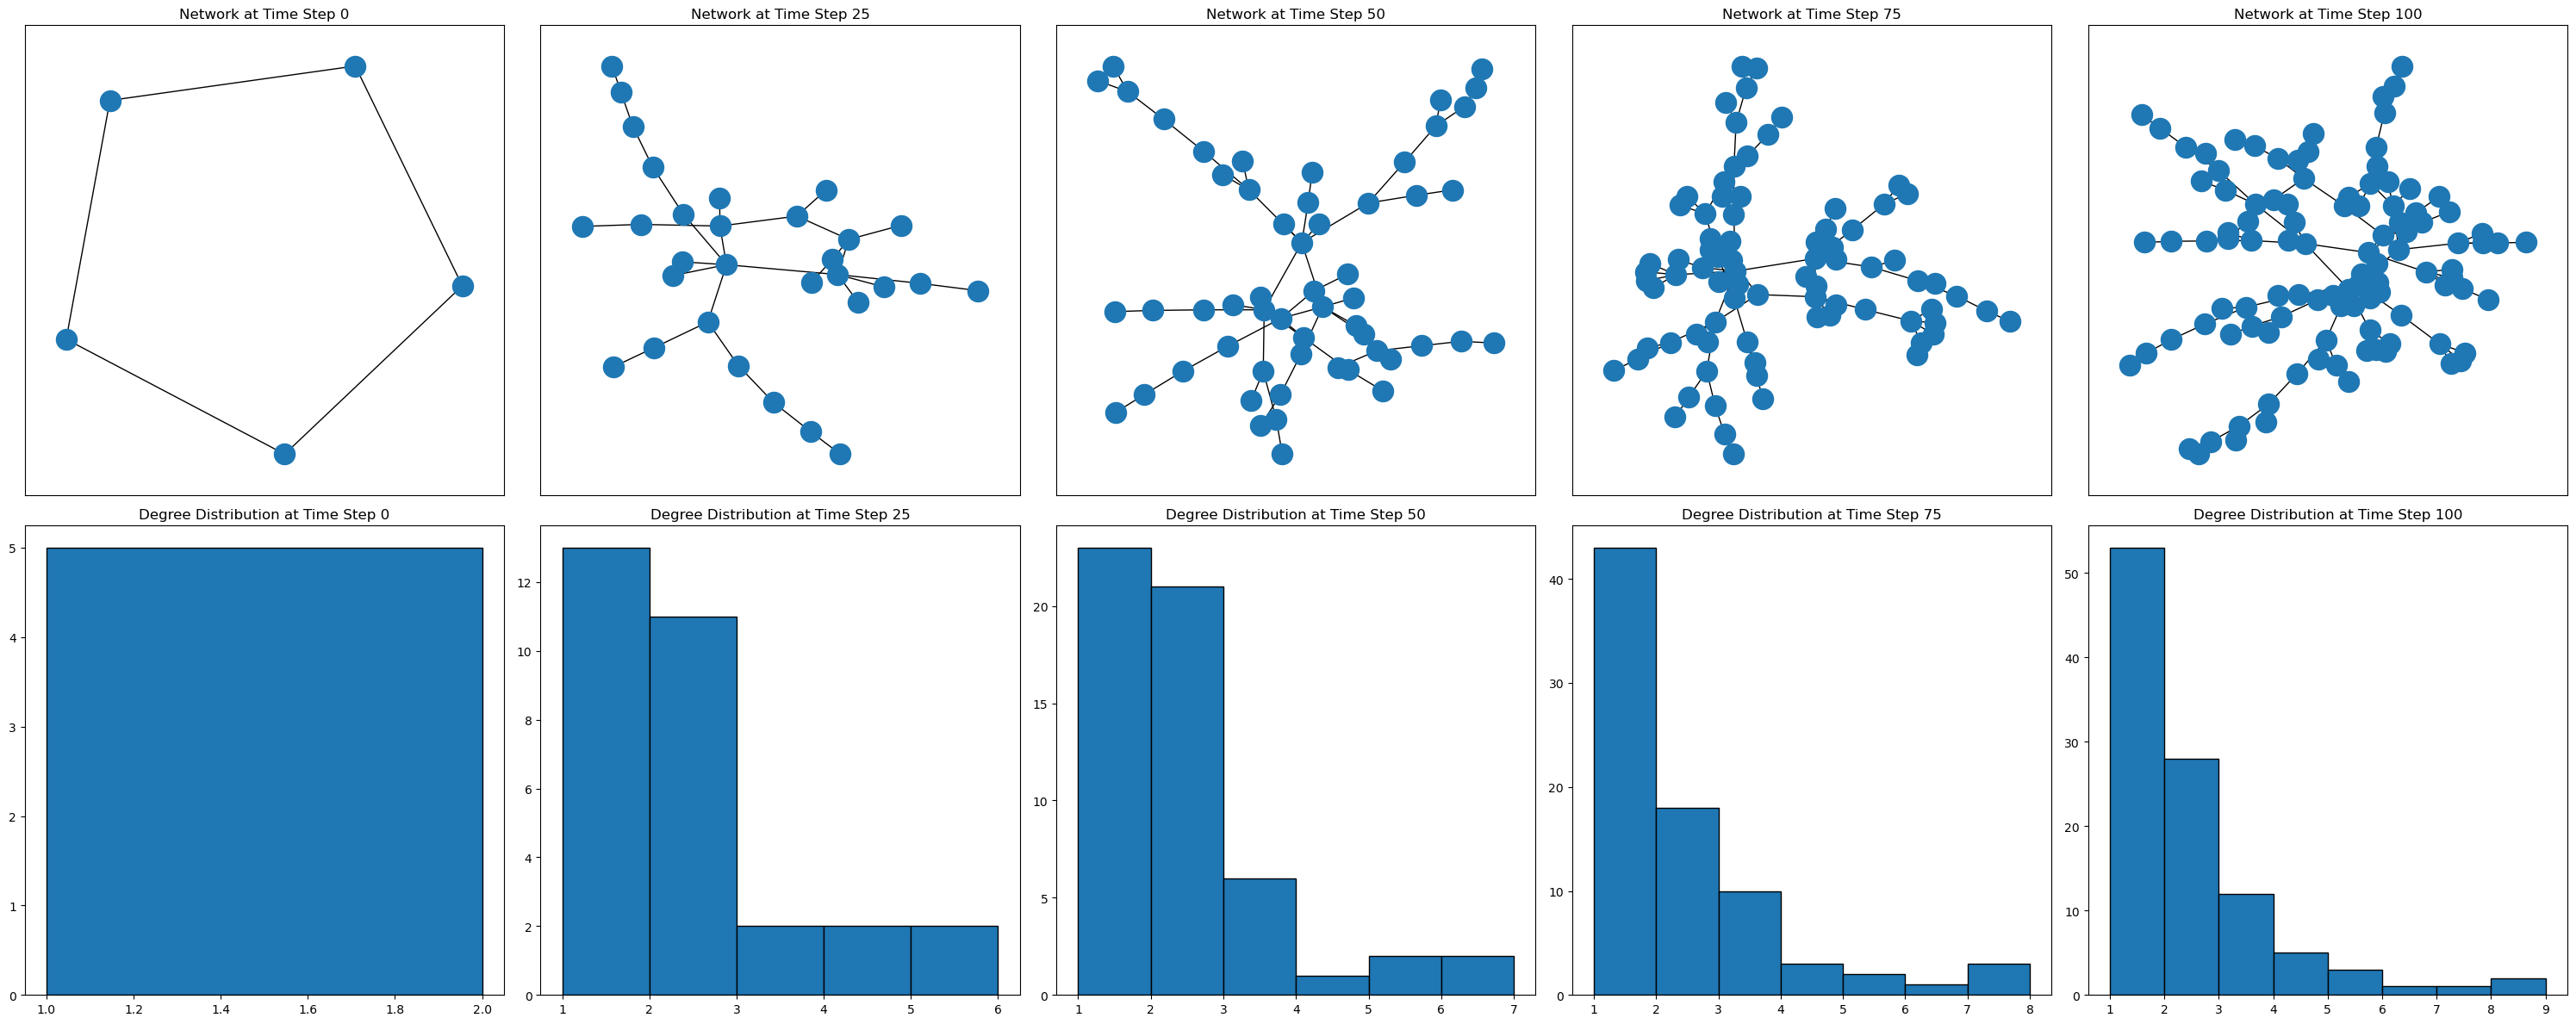

In [19]:
simulate_network_dynamics(5, 2, 100, random_attachment)


The random attachment should lead to a more uniformly distributed degree distribution. Remember to play with the parameters, in this case mabe you need more time steps.

## Task 2:

proportional to the square of the node degree (strong preferential attachment)

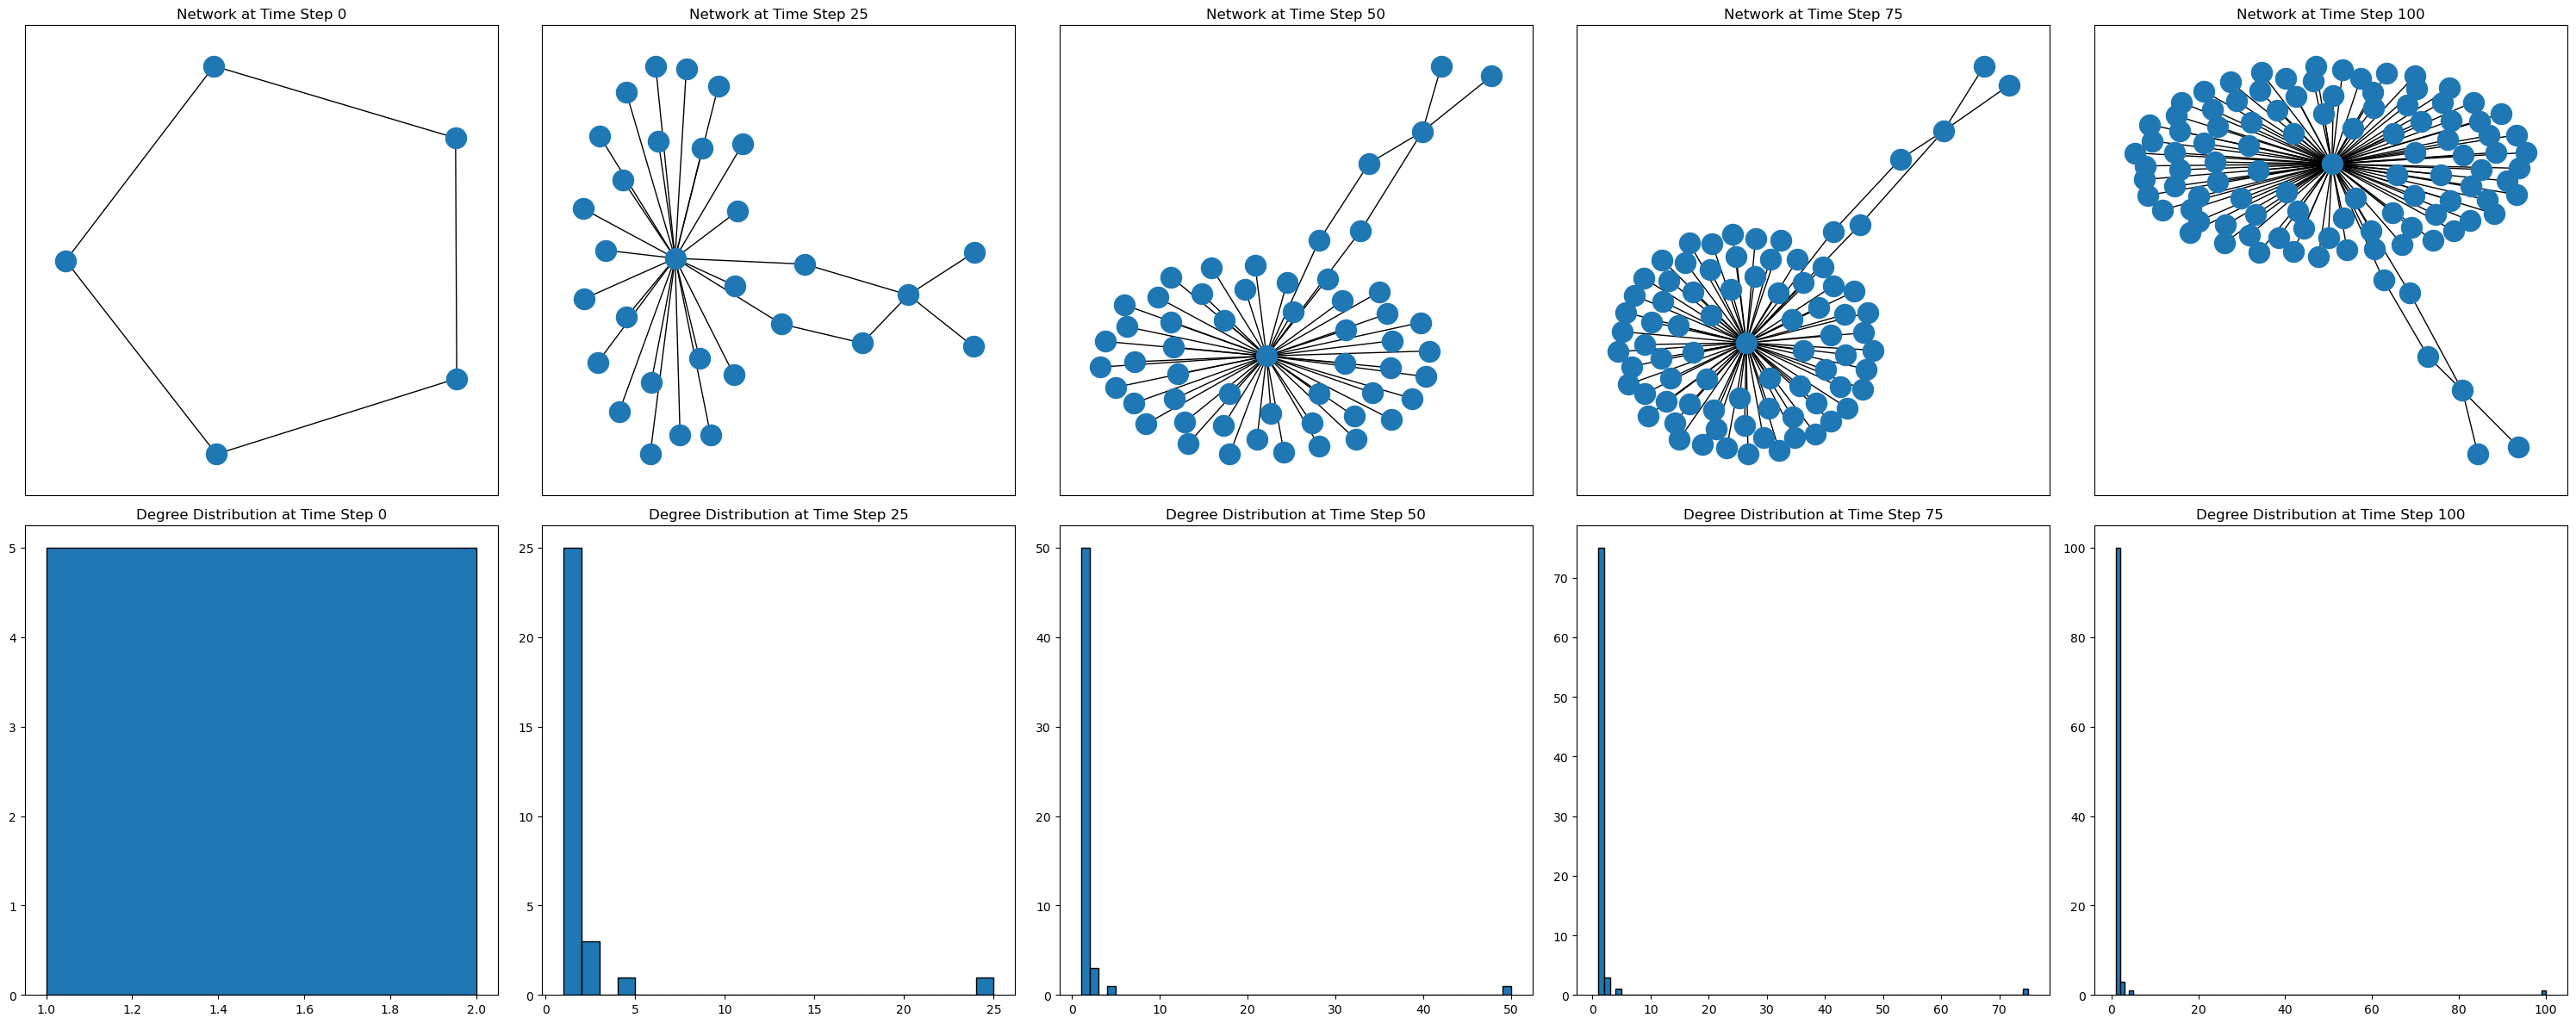

In [20]:
simulate_network_dynamics(5, 2, 100, strong_preferential_attachment)


Here, the strong preferential attachment should create a few very high-degree nodes (hubs). 

## Task 3:
inversely proportional to the node degree (negative preferential attachment).

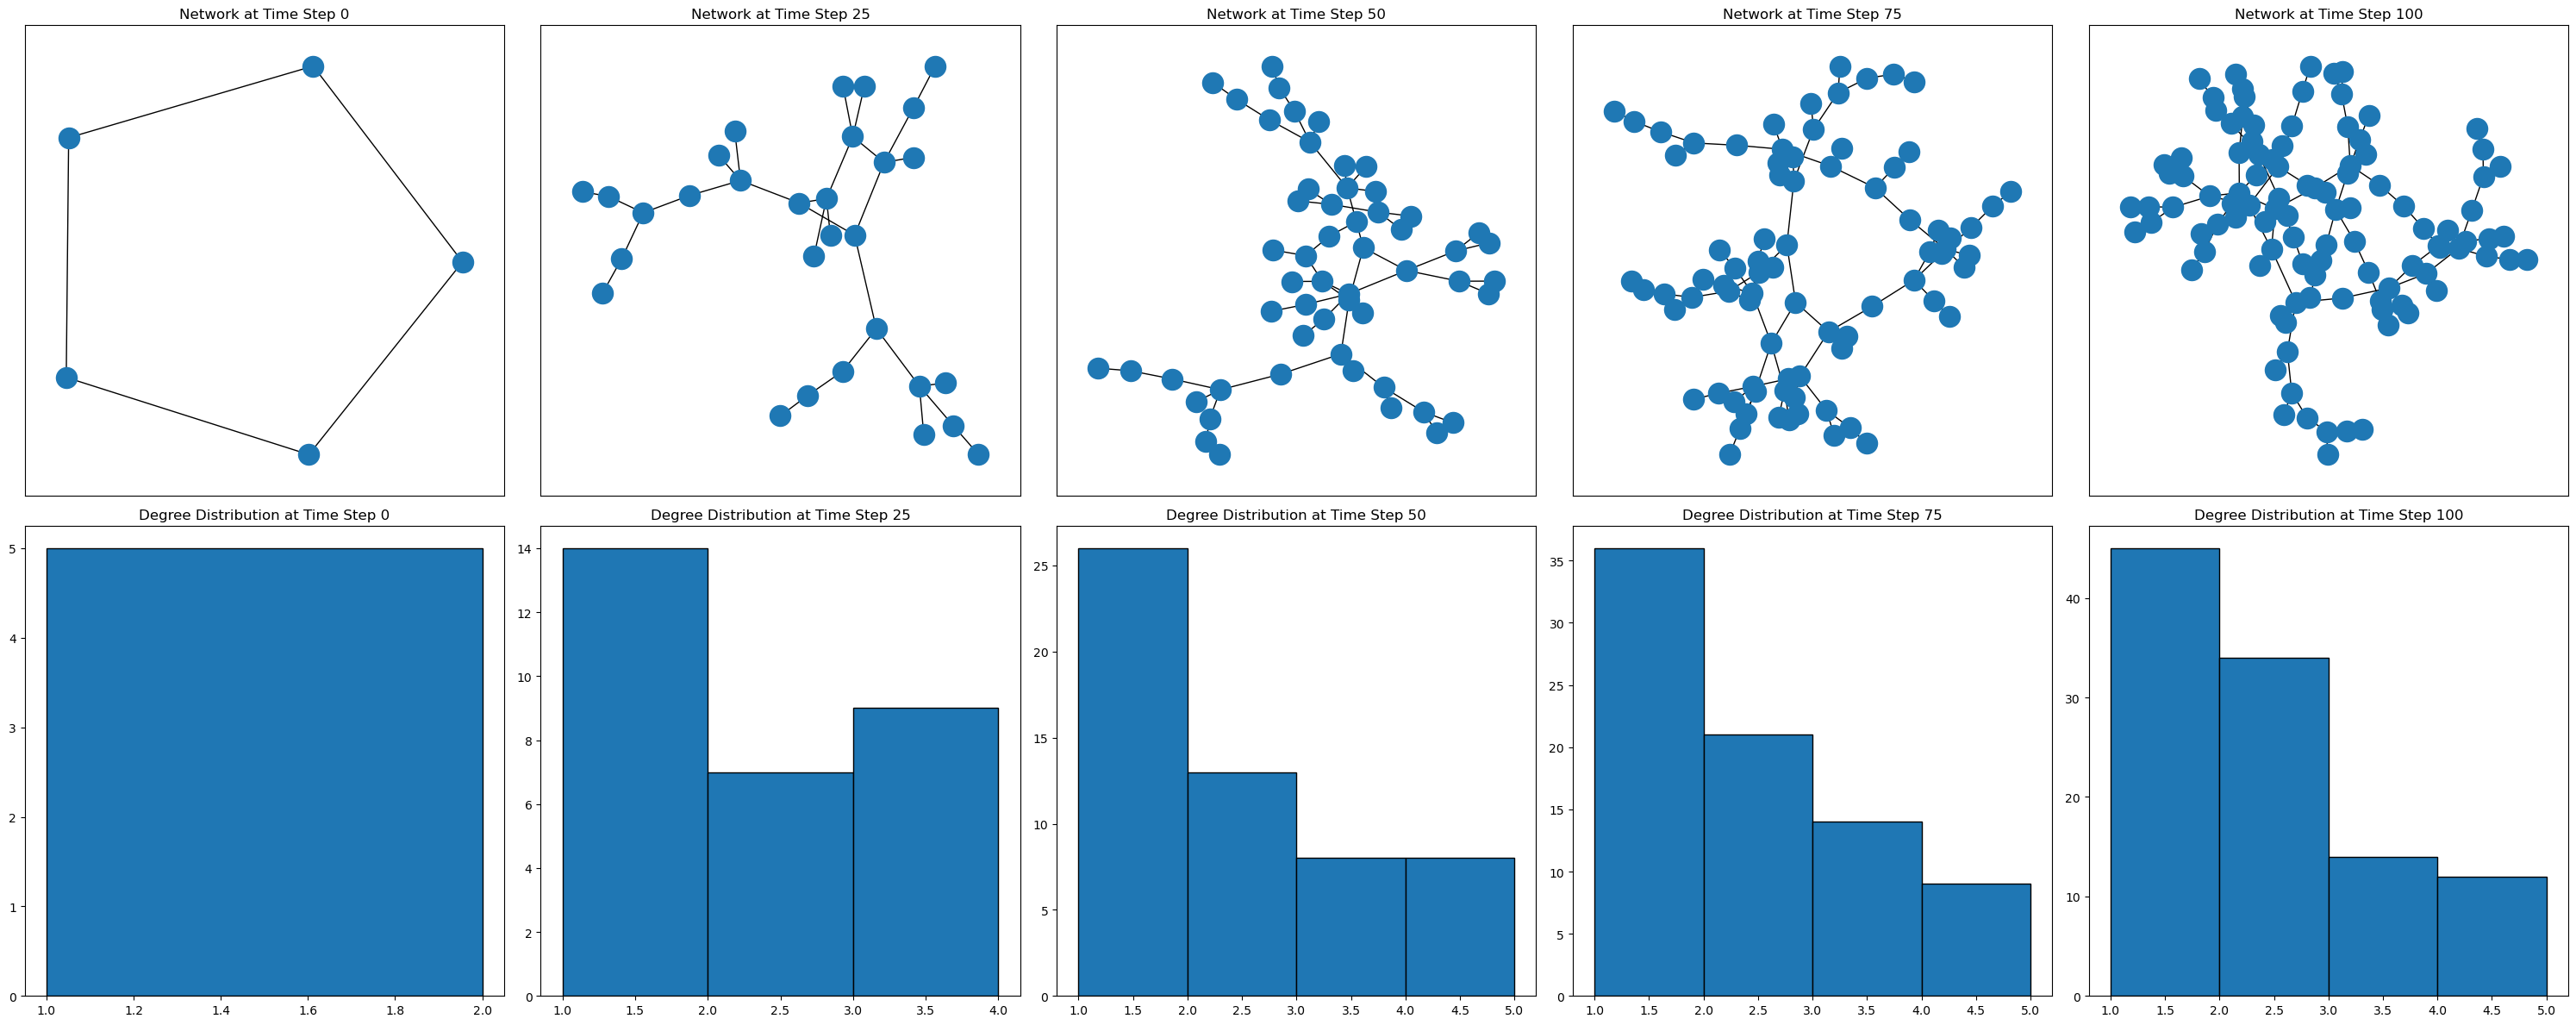

In [21]:
simulate_network_dynamics(5, 2, 100, negative_preferential_attachment)

Negative preferential attachment, on the other hand, will discourage the formation of hubs, and may lead to a more evenly distributed network structure.

**Note:**

Start playing changing different parameters. But be aware of the computation time.
Have Fun !!!